# Customer analysis

In this exercise, you work for a consulting firm as data analyst. One of your clients asked for help to understand its customer buying behavior. 

You dispose of a dataset from its e-commerce website with 13 features : 

- order_id : ID if the order
- order_status : Status of the order
- order_purchase_timestamp : Timestamp of the purchase
- order_delivered_customer_date : Timestamp of the delivery to the customer
- payment_type : Method of payment
- payment_installments : Number of payments for this purchase (does NOT affect the payment value)
- payment_value : Total amount of the payment
- review_score : Score given by the client, ranges from 1 to 5
- customer_unique_id : ID of the customer who purchased
- customer_zip_code_prefix : Zip code of the customer
- customer_city : City of the customer
- customer_state : State of the customer
- product_category_name_english : Name of the product category in English

With this data, you have to analyze customer behavior with two techniques:

- Customer segmentation with RFM
- Cohort analysis from Sept 2016 to October 2018.

At the end, you have to present your analysis with actionable insights to improve the customer relationship of your client. 

# Understanding RFM Segmentation 

❓ What are the 3 metrics used in an RFM Segmentation? (hint : What does RFM stand for?) 

- Récence (date de la dernière commande)
- Fréquence des commandes (fréquence des achats sur une période de référence donnée)
- Montant (de la dernière commande ou sur une période de référence donnée)

❓ Can you summarize what each metric measures in one sentence?

Identifie :
- clients perdus depuis longtemps
- clients non confirmés
- clients réguliers perdus récemment
- clients récents à petit CA
- clients récents à fort CA
- clients réguliers en décroissance
- clients réguliers à petit CA
- clients réguliers en développement
- très bons clients réguliers

❓ What data / or type of data do you need for each metric ? 

Timestamp ou Datetime de la dernière commande, Nombre de commandes & montant des commandes effectuées

Let's explore the dataset!

In [2]:
import pandas as pd
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.colors as mcolors

# Exploratory Data Analysis

Load the dataset and start an Exploratory Data Analysis

In [90]:
df = pd.read_csv('data/db_customers.csv')

In [6]:
df_test[df_test['customer_unique_id']=='9a736b248f67d166d2fbb006bcb877c3']['order_id'].value_counts()

895ab968e7bb0d5659d16cd74cd1650c    42
67d83bd36ec2c7fb557742fb58837659    12
Name: order_id, dtype: int64

❓ Which features should be formated in datetime ? 
Convert them

In [7]:
df.head()

,order_id,order_status,order_purchase_timestamp,order_delivered_customer_date,payment_type,payment_installments,payment_value,review_score,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,credit_card,1.0,18.12,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,voucher,1.0,2.00,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,voucher,1.0,18.59,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,boleto,1.0,141.46,4,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,credit_card,3.0,179.12,5,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,auto


Les features à convertir en format datetime : order_purchase_timestamp & order_delivered_customer_date

In [91]:
df['order_purchase_timestamp'] = df['order_purchase_timestamp'].apply(pd.to_datetime)
df['order_delivered_customer_date'] = df['order_delivered_customer_date'].apply(pd.to_datetime)

❓ Which features are Categorical ? List the unique values on these features.

Les features qualitatives : order_status, payment_type, payment_installments, review_score, customer_state, product_category_name_english, customer_zip_code_prefix & customer_city

In [9]:
df['order_status'].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [10]:
df['payment_type'].unique()

array(['credit_card', 'voucher', 'boleto', 'debit_card', 'not_defined',
       nan], dtype=object)

In [11]:
df['payment_installments'].unique()

array([ 1.,  3.,  6., 10.,  4.,  2.,  8.,  9.,  7.,  5., 13., 12., 15.,
       14., 21., 18., 24., 17., 11., 20., 23., 16., nan, 22.,  0.])

In [12]:
df['review_score'].unique()

array([4, 5, 2, 1, 3], dtype=int64)

In [13]:
df['customer_state'].unique()

array(['SP', 'BA', 'GO', 'RN', 'PR', 'RS', 'RJ', 'MG', 'SC', 'RR', 'PE',
       'TO', 'CE', 'DF', 'SE', 'MT', 'PB', 'PA', 'RO', 'ES', 'AP', 'MS',
       'MA', 'PI', 'AL', 'AC', 'AM'], dtype=object)

In [14]:
df['product_category_name_english'].unique()

array(['housewares', 'perfumery', 'auto', 'pet_shop', 'stationery', nan,
       'furniture_decor', 'office_furniture', 'garden_tools',
       'computers_accessories', 'bed_bath_table', 'toys',
       'construction_tools_construction', 'telephony', 'health_beauty',
       'electronics', 'baby', 'cool_stuff', 'watches_gifts',
       'air_conditioning', 'sports_leisure', 'books_general_interest',
       'small_appliances', 'food', 'luggage_accessories',
       'fashion_underwear_beach', 'christmas_supplies',
       'fashion_bags_accessories', 'musical_instruments',
       'construction_tools_lights', 'books_technical',
       'costruction_tools_garden', 'home_appliances', 'market_place',
       'agro_industry_and_commerce', 'party_supplies', 'home_confort',
       'cds_dvds_musicals', 'industry_commerce_and_business',
       'consoles_games', 'furniture_bedroom', 'construction_tools_safety',
       'fixed_telephony', 'drinks',
       'kitchen_dining_laundry_garden_furniture', 'fashion_sho

In [15]:
df['customer_zip_code_prefix'].unique()

array([ 3149, 47813, 75265, ..., 83870,  5127, 45920], dtype=int64)

In [16]:
df['customer_city'].unique()

array(['sao paulo', 'barreiras', 'vianopolis', ..., 'messias targino',
       'campo do tenente', 'nova vicosa'], dtype=object)

❓ Check for missing values. What do you notice ? 


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105383 entries, 0 to 105382
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       105383 non-null  object        
 1   order_status                   105383 non-null  object        
 2   order_purchase_timestamp       105383 non-null  datetime64[ns]
 3   order_delivered_customer_date  102224 non-null  datetime64[ns]
 4   payment_type                   105382 non-null  object        
 5   payment_installments           105382 non-null  float64       
 6   payment_value                  105382 non-null  float64       
 7   review_score                   105383 non-null  int64         
 8   customer_unique_id             105383 non-null  object        
 9   customer_zip_code_prefix       105383 non-null  int64         
 10  customer_city                  105383 non-null  object        
 11  

In [18]:
len(df.index)

105383

Il y a des valeurs manquantes pour les colonnes : order_delivered_customer_date, payment_type, payment_installments, payment_value & product_category_name_english

In [19]:
df[df['payment_value']==0]

,order_id,order_status,order_purchase_timestamp,order_delivered_customer_date,payment_type,payment_installments,payment_value,review_score,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name_english
455,45ed6e85398a87c253db47c2d9f48216,delivered,2017-06-08 21:18:45,2017-06-22 17:44:53,voucher,1.0,0.0,1,e4000306cf2f63714e6bb70dd20a6592,74595,goiania,GO,perfumery
1199,00b1cb0320190ca0daa2c88b35206009,canceled,2018-08-28 15:26:39,NaT,not_defined,1.0,0.0,1,4fa4365000c7090fcb8cad5713c6d3db,1151,sao paulo,SP,NaN
27492,fa65dad1b0e818e3ccc5cb0e39231352,shipped,2017-04-20 12:45:34,NaT,voucher,1.0,0.0,1,8af7ac63b2efbcbd88e5b11505e8098a,78065,cuiaba,MT,garden_tools
27501,fa65dad1b0e818e3ccc5cb0e39231352,shipped,2017-04-20 12:45:34,NaT,voucher,1.0,0.0,1,8af7ac63b2efbcbd88e5b11505e8098a,78065,cuiaba,MT,garden_tools
34272,6ccb433e00daae1283ccc956189c82ae,delivered,2017-10-26 23:51:35,2017-11-08 18:47:00,voucher,1.0,0.0,4,677ad9cdca6c47c733f0cc6e23d7bb4c,25625,petropolis,RJ,sports_leisure
42372,4637ca194b6387e2d538dc89b124b0ee,canceled,2018-09-03 14:14:25,NaT,not_defined,1.0,0.0,3,968fac81e2c44fb6c1e3ac2a45e6a102,4685,sao paulo,SP,NaN
42704,c8c528189310eaa44a745b8d9d26908b,canceled,2018-08-28 20:05:14,NaT,not_defined,1.0,0.0,1,6ba987d564bad1f9da8e14b9d3b71c8f,8042,sao paulo,SP,NaN
90864,b23878b3e8eb4d25a158f57d96331b18,delivered,2017-05-27 19:20:24,2017-06-07 08:53:10,voucher,1.0,0.0,5,9077449283dc1319d5e51fb3159b28e2,29230,anchieta,ES,consoles_games
102738,8bcbe01d44d147f901cd3192671144db,delivered,2018-01-24 23:24:14,2018-02-02 21:26:42,voucher,1.0,0.0,4,cc5aa1b8337e394da54980226bb0f6d4,21040,rio de janeiro,RJ,stationery


❓ Can you find an explanation for the missing `order_delivered_customer_date` ? 
(hint : Check for non delivered orders)

In [20]:
df[df['order_status'] != 'delivered']

,order_id,order_status,order_purchase_timestamp,order_delivered_customer_date,payment_type,payment_installments,payment_value,review_score,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name_english
8,136cce7faa42fdb2cefd53fdc79a6098,invoiced,2017-04-11 12:22:08,NaT,credit_card,1.0,65.95,2,36edbb3fb164b1f16485364b6fb04c73,98900,santa rosa,RS,NaN
49,ee64d42b8cf066f35eac1cf57de1aa85,shipped,2018-06-04 16:44:48,NaT,boleto,1.0,22.36,1,08fb46d35bb3ab4037202c23592d1259,13215,jundiai,SP,health_beauty
111,0760a852e4e9d89eb77bf631eaaf1c84,invoiced,2018-08-03 17:44:42,NaT,boleto,1.0,50.35,3,c7f8d7b1fffc946d7069574f74c39f4e,88140,santo amaro da imperatriz,SC,christmas_supplies
137,15bed8e2fec7fdbadb186b57c46c92f2,processing,2017-09-03 14:22:03,NaT,credit_card,2.0,138.28,5,9f269af9c49244f6ba4a46985a3cfc2e,3436,sao paulo,SP,perfumery
164,6942b8da583c2f9957e990d028607019,shipped,2018-01-10 11:33:07,NaT,boleto,1.0,69.12,2,528b011eb7fab3d59c336cc7248eed3a,38600,paracatu,MG,perfumery
...,...,...,...,...,...,...,...,...,...,...,...,...,...
105219,3a3cddda5a7c27851bd96c3313412840,canceled,2018-08-31 16:13:44,NaT,voucher,1.0,63.89,5,e90598185d2427a35e32ef241a5c04aa,11075,santos,SP,NaN
105250,e9e64a17afa9653aacf2616d94c005b8,processing,2018-01-05 23:07:24,NaT,boleto,1.0,144.56,1,965191786b70912f793e4a777fd623cd,13050,campinas,SP,watches_gifts
105287,a89abace0dcc01eeb267a9660b5ac126,canceled,2018-09-06 18:45:47,NaT,voucher,1.0,107.13,4,d05c44a138277ad325d915c6b7ccbcdf,5344,sao paulo,SP,NaN
105288,a69ba794cc7deb415c3e15a0a3877e69,unavailable,2017-08-23 16:28:04,NaT,credit_card,2.0,195.91,1,e72a90a2b29fe1a8795b284aaaa3246f,22723,rio de janeiro,RJ,NaN


In [21]:
len(df.index) - len(df[df['order_status'] != 'delivered'].index)

102225

C'est quasimment le nombre de valeurs dans la colonne order_delivered_customer_date (soit 102224)

In [22]:
df[df['payment_type'].isnull()]

,order_id,order_status,order_purchase_timestamp,order_delivered_customer_date,payment_type,payment_installments,payment_value,review_score,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name_english
32587,bfbd0f9bdef84302105ad712db648a6c,delivered,2016-09-15 12:16:38,2016-11-09 07:47:38,NaN,NaN,NaN,1,830d5b7aaa3b6f1e9ad63703bec97d23,14600,sao joaquim da barra,SP,health_beauty


❓ What are the proportions of each `order_status` ? 

In [23]:
df['order_status'].value_counts()

delivered      102225
shipped          1180
canceled          669
unavailable       651
invoiced          330
processing        321
created             5
approved            2
Name: order_status, dtype: int64

❓ Which `order_status` do you think should be removed from the analysis

In [92]:
df = df[(df['order_status'] == 'delivered') | (df['order_status'] == 'shipped')]

In [93]:
df['order_status'].unique()

array(['delivered', 'shipped'], dtype=object)

❓ What feature would you choose in the e-commerce dataset provided? 

order_purchase_timestamp, payment_value & order_id (& customer_unique_id)

In [94]:
df = df[['customer_unique_id','order_purchase_timestamp','order_id','payment_value']]

❓ What method would you use to group the data? 

groupby()

❓ What feature would you use to group the data? 

customer_unique_id

Group the data. (Hint: you can carry out the grouping one by one and then merge, or even better use the .agg method and get a robust grouping in one line of code)

In [95]:
order_group = df.groupby(by='order_id').max().reset_index()
frequence = order_group.groupby(by='customer_unique_id').count().reset_index()

In [96]:
frequence = frequence.drop(['order_purchase_timestamp','payment_value'], axis=1)
frequence.columns = ['customer_unique_id', 'frequence']

In [97]:
montant = df.groupby(by='customer_unique_id').sum().reset_index()
montant.columns = ['customer_unique_id', 'montant']

What type of data is the R supposed to be? Is it in the right format? (Hint : investigate the difference between `datetime` and `timedelta`) 

timedelta

So there is one more step to carry out before the data is ready : Calculate the recency base on the date of the purchase

❓ What is the date of the least recent purchase?

In [30]:
df['order_purchase_timestamp'].min()

Timestamp('2016-09-04 21:15:19')

❓What is the date of the most recent purchase?

In [31]:
df['order_purchase_timestamp'].max()

Timestamp('2018-09-03 09:06:57')

❓How would you calculate the recency? (hint: what date would you use to compare with the purchase date? Today? probably not...)

df['order_purchase_timestamp'].max() - df['order_purchase_timestamp'].min()

Create a feature calculating the difference between `the most recent purchased + 1 day`, and `order_purchase_timestamp`.

In [98]:
df_recence = df.copy()

In [99]:
date_format = "%m/%d/%Y"
a = df['order_purchase_timestamp']
b = max(df['order_purchase_timestamp'])


df_recence['recence'] = b-a
df_recence['recence'] = df_recence['recence'].astype('timedelta64[D]')+1

recence = df_recence.groupby(df_recence.customer_unique_id).min().reset_index()
recence = recence.drop(['payment_value', 'order_id','order_purchase_timestamp'], axis=1)

In [100]:
df_rfm = frequence.merge(montant, how='inner', on='customer_unique_id')
df_rfm = df_rfm.merge(recence, how='inner', on='customer_unique_id')

In [101]:
df_rfm

,customer_unique_id,frequence,montant,recence
0,0000366f3b9a7992bf8c76cfdf3221e2,1,141.90,116.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,27.19,119.0
2,0000f46a3911fa3c0805444483337064,1,86.22,542.0
3,0000f6ccb0745a6a4b88665a16c9f078,1,43.62,326.0
4,0004aac84e0df4da2b147fca70cf8255,1,196.89,293.0
...,...,...,...,...
94394,fffcf5a5ff07b0908bd4e2dbc735a684,1,2067.42,452.0
94395,fffea47cd6d3cc0a88bd621562a9d061,1,84.58,267.0
94396,ffff371b4d645b6ecea244b27531430a,1,112.46,573.0
94397,ffff5962728ec6157033ef9805bacc48,1,133.69,124.0


Now that you have created a new dataset with the right columns, explore it to understand what you created.

❓Which column is the R? The F? The M?

In [102]:
R = df_rfm['recence']
F = df_rfm['frequence']
M = df_rfm['montant']

In [37]:
F.value_counts()

1     91538
2      2629
3       184
4        29
5         9
6         5
7         3
9         1
16        1
Name: frequence, dtype: int64

Now for each metric independantly, build clutsers (Hint 1: you can use `.describe()` to have insights about each metrics. Hint 2: Don't choose more than 3 clusters)

In [38]:
df_rfm.describe()

,frequence,montant,recence
count,94399.000000,94399.000000,94399.000000
mean,1.033750,168.250134,242.864162
std,0.210542,232.880460,152.723176
min,1.000000,0.000000,1.000000
25%,1.000000,63.110000,119.000000
50%,1.000000,108.100000,224.000000
75%,1.000000,184.590000,352.000000
max,16.000000,13664.080000,729.000000


Now that you have clusters for each category, explain the different buying behaviors

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='frequence', ylabel='count'>

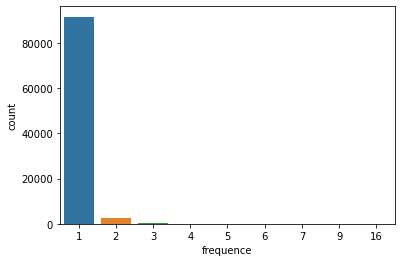

In [40]:
sns.countplot(df_rfm.frequence)

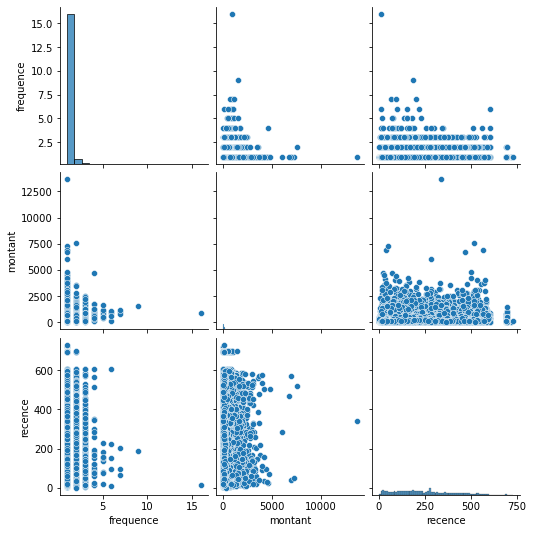

In [41]:
sns.pairplot(df_rfm)

<AxesSubplot:xlabel='recence', ylabel='count'>

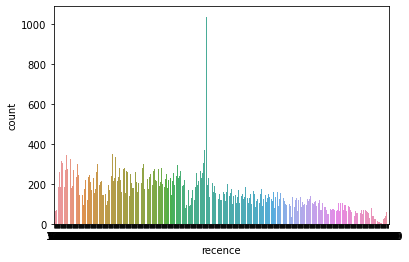

In [42]:
sns.countplot(x=df_rfm.recence)

In [103]:
df_rfm['R'] = -1
df_rfm['F'] = -2
df_rfm['M'] = -3

In [44]:
df_rfm

,customer_unique_id,frequence,montant,recence,R,F,M
0,0000366f3b9a7992bf8c76cfdf3221e2,1,141.90,116.0,-1,-2,-3
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,27.19,119.0,-1,-2,-3
2,0000f46a3911fa3c0805444483337064,1,86.22,542.0,-1,-2,-3
3,0000f6ccb0745a6a4b88665a16c9f078,1,43.62,326.0,-1,-2,-3
4,0004aac84e0df4da2b147fca70cf8255,1,196.89,293.0,-1,-2,-3
...,...,...,...,...,...,...,...
94394,fffcf5a5ff07b0908bd4e2dbc735a684,1,2067.42,452.0,-1,-2,-3
94395,fffea47cd6d3cc0a88bd621562a9d061,1,84.58,267.0,-1,-2,-3
94396,ffff371b4d645b6ecea244b27531430a,1,112.46,573.0,-1,-2,-3
94397,ffff5962728ec6157033ef9805bacc48,1,133.69,124.0,-1,-2,-3


In [111]:
for i in range(0,len(df_rfm.index)):
    if df_rfm['frequence'].iloc[i]==1:
        df_rfm['F'].iloc[i]=3
    elif df_rfm['frequence'].iloc[i]==2:
        df_rfm['F'].iloc[i]=2
    elif df_rfm['frequence'].iloc[i]>2:
        df_rfm['F'].iloc[i]=1

In [105]:
df_rfm['F'].value_counts()

1    91538
2     2629
3      232
Name: F, dtype: int64

In [106]:
for i in range(0,len(df_rfm.index)):
    if df_rfm['montant'].iloc[i]>=184.59:
        df_rfm['M'].iloc[i]=1
    elif (df_rfm['montant'].iloc[i]>63.11) & (df_rfm['montant'].iloc[i]<184.59):
        df_rfm['M'].iloc[i]=2
    elif df_rfm['montant'].iloc[i]<=63.11:
        df_rfm['M'].iloc[i]=3

In [48]:
df_rfm['M'].value_counts()

2    47182
3    23613
1    23604
Name: M, dtype: int64

In [107]:
for i in range(0,len(df_rfm.index)):
    if df_rfm['recence'].iloc[i]<=119:
        df_rfm['R'].iloc[i]=1
    elif (df_rfm['recence'].iloc[i]>119) & (df_rfm['recence'].iloc[i]<352):
        df_rfm['R'].iloc[i]=2
    elif df_rfm['recence'].iloc[i]>=352:
        df_rfm['R'].iloc[i]=3

In [50]:
df_rfm['R'].value_counts()

2    47089
1    23704
3    23606
Name: R, dtype: int64

In [51]:
df_rfm

,customer_unique_id,frequence,montant,recence,R,F,M
0,0000366f3b9a7992bf8c76cfdf3221e2,1,141.90,116.0,1,1,2
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,27.19,119.0,1,1,3
2,0000f46a3911fa3c0805444483337064,1,86.22,542.0,3,1,2
3,0000f6ccb0745a6a4b88665a16c9f078,1,43.62,326.0,2,1,3
4,0004aac84e0df4da2b147fca70cf8255,1,196.89,293.0,2,1,1
...,...,...,...,...,...,...,...
94394,fffcf5a5ff07b0908bd4e2dbc735a684,1,2067.42,452.0,3,1,1
94395,fffea47cd6d3cc0a88bd621562a9d061,1,84.58,267.0,2,1,2
94396,ffff371b4d645b6ecea244b27531430a,1,112.46,573.0,3,1,2
94397,ffff5962728ec6157033ef9805bacc48,1,133.69,124.0,2,1,2


In [108]:
df_rfm['Score_RFM'] = -1

- clients perdus depuis longtemps
- clients non confirmés
- clients réguliers perdus récemment
- clients récents à petit CA
- clients récents à fort CA
- clients réguliers en décroissance
- clients réguliers à petit CA
- clients réguliers en développement
- très bons clients réguliers

In [112]:
for i in range(0,len(df_rfm.index)):
    if (df_rfm['R'].iloc[i]==1) & (df_rfm['F'].iloc[i]==1) & (df_rfm['M'].iloc[i]==1):
        df_rfm['Score_RFM'].iloc[i]='Top'
    elif (df_rfm['R'].iloc[i]==2) & (df_rfm['F'].iloc[i]==1) & (df_rfm['M'].iloc[i]==1):
        df_rfm['Score_RFM'].iloc[i]='Bon client en perte'
    elif (df_rfm['R'].iloc[i]==3) & (df_rfm['F'].iloc[i]==1) & (df_rfm['M'].iloc[i]==2):
        df_rfm['Score_RFM'].iloc[i]='Bon client perdu'
    elif (df_rfm['R'].iloc[i]==1) & (df_rfm['F'].iloc[i]==3):
        df_rfm['Score_RFM'].iloc[i]='Un achat'
    else:
        df_rfm['Score_RFM'].iloc[i]='Moyen'

In [113]:
df_rfm['Score_RFM'].value_counts()

Moyen                  71325
Un achat               22896
Bon client en perte      100
Top                       69
Bon client perdu           9
Name: Score_RFM, dtype: int64

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Score_RFM', ylabel='count'>

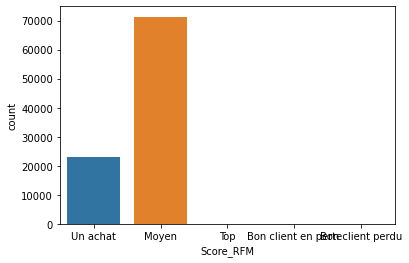

In [114]:
sns.countplot(df_rfm['Score_RFM'])

# Working with cohorts

❓What is a cohort? 

❓Why is it interesting to analyse cohorts ? 

❓What data (already existing in the original dataset) do we need to build a cohort? 

customer_unique_id, order_purchase_timestamp & order_id

Build a new df with just these 3 features

In [3]:
df = pd.read_csv('data/db_customers.csv')

In [4]:
df['order_purchase_timestamp'] = df['order_purchase_timestamp'].apply(pd.to_datetime)
df['order_delivered_customer_date'] = df['order_delivered_customer_date'].apply(pd.to_datetime)

In [5]:
df_c = df.copy()

In [6]:
df_c = df_c[['customer_unique_id','order_purchase_timestamp','order_id']]

Using the `pandas.Serie.dt.to_period()` methode, create a new feature converting `order_purchase_timestamp` in months

In [8]:
df_c['order_month'] = df_c['order_purchase_timestamp'].dt.to_period("M")

Create a new feature called `cohort` by grouping the previous df by `customer_unique_id`, and tranforming it's minimum value in months (with the same `pandas.Serie.dt.to_period()` as before)

In [9]:
# For the teachers, To filter by only the customer that have done 2 or more purchases
df_more =pd.DataFrame(df_c.groupby('customer_unique_id').size()[df_c.groupby('customer_unique_id').size() > 1])
df_c = df_c.merge(df_more, how='left', on='customer_unique_id').rename(columns={0:'na'})

df_c = df_c[df_c['na'].notna()]

In [10]:
df_c['cohort'] = df_c.groupby('customer_unique_id')['order_purchase_timestamp'] \
                 .transform('min') \
                 .dt.to_period('M') 
df_c

,customer_unique_id,order_purchase_timestamp,order_id,order_month,na,cohort
0,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33,e481f51cbdc54678b7cc49136f2d6af7,2017-10,4.0,2017-09
1,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33,e481f51cbdc54678b7cc49136f2d6af7,2017-10,4.0,2017-09
2,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33,e481f51cbdc54678b7cc49136f2d6af7,2017-10,4.0,2017-09
11,299905e3934e9e181bfb2e164dd4b4f8,2017-07-29 11:55:02,e69bfb5eb88e0ed6a785585b27e16dbf,2017-07,2.0,2017-07
12,299905e3934e9e181bfb2e164dd4b4f8,2017-07-29 11:55:02,e69bfb5eb88e0ed6a785585b27e16dbf,2017-07,2.0,2017-07
...,...,...,...,...,...,...
105367,9e4accf95024aa6565ca1efcadb96752,2018-05-12 13:42:24,19dba6d1e58b04e7fc820558a38ea398,2018-05,2.0,2017-09
105373,c716cf2b5b86fb24257cffe9e7969df8,2017-10-04 19:57:37,9115830be804184b91f5c00f6f49f92d,2017-10,2.0,2017-10
105374,c716cf2b5b86fb24257cffe9e7969df8,2017-10-04 19:57:37,9115830be804184b91f5c00f6f49f92d,2017-10,2.0,2017-10
105375,e03dbdf5e56c96b106d8115ac336f47f,2017-01-27 00:30:03,aa04ef5214580b06b10e2a378300db44,2017-01,2.0,2017-01


Now groupby `['cohort', 'order_month']` and aggregate by `nunique()` `customer_unique_id`

In [73]:
df_c_com = df_c.groupby(['cohort', 'order_month']).agg({"customer_unique_id": 'nunique'}).reset_index()

In [74]:
df_c_com 

,cohort,order_month,customer_unique_id
0,2016-10,2016-10,12
1,2016-10,2017-04,1
2,2016-10,2017-07,1
3,2016-10,2017-09,1
4,2016-10,2017-11,1
...,...,...,...
217,2018-07,2018-08,44
218,2018-07,2018-09,2
219,2018-08,2018-08,51
220,2018-08,2018-09,7


In [75]:
# pdf_c.groupby(by=['cohort', 'order_month']).nunique().reset_index()

Finally, create a feature called `['period_number']` where you substract the `cohort` to the `order_month` and get the `'n'` attribute thanks to the `operator.attrgetter` method

Explore a cohort (for example 2017-01) and try to understand what it shows

In [76]:
df_c_com[df_c_com['cohort']=='2017-01']

,cohort,order_month,customer_unique_id
11,2017-01,2017-01,58
12,2017-01,2017-02,3
13,2017-01,2017-03,2
14,2017-01,2017-04,1
15,2017-01,2017-05,3
16,2017-01,2017-06,1
17,2017-01,2017-07,4
18,2017-01,2017-08,1
19,2017-01,2017-09,1
20,2017-01,2017-11,3


In [77]:
import operator

In [78]:
df_c_com['period_number'] = (df_c_com['order_month']-df_c_com['cohort']).apply(operator.attrgetter('n'))

In [79]:
df_c_com

,cohort,order_month,customer_unique_id,period_number
0,2016-10,2016-10,12,0
1,2016-10,2017-04,1,6
2,2016-10,2017-07,1,9
3,2016-10,2017-09,1,11
4,2016-10,2017-11,1,13
...,...,...,...,...
217,2018-07,2018-08,44,1
218,2018-07,2018-09,2,2
219,2018-08,2018-08,51,0
220,2018-08,2018-09,7,1


Pivot the DataFrame using the methode : `DataFrame.pivot_table` (hint : use `'cohort'` as `index`, `'period_number'` as columns, and `'n_customers'` as `values`)

In [80]:
df_c_com = df_c_com.pivot_table(index='cohort', columns= 'period_number', values= 'customer_unique_id')

In [81]:
df_c_com

period_number,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,20
cohort,,,,,,,,,,,,,,,,,,,,
2016-10,12.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,2.0,2.0
2016-12,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,58.0,3.0,2.0,1.0,3.0,1.0,4.0,1.0,1.0,NaN,3.0,1.0,6.0,3.0,1.0,1.0,2.0,3.0,1.0,NaN
2017-02,73.0,4.0,5.0,2.0,7.0,2.0,4.0,3.0,3.0,4.0,2.0,5.0,3.0,3.0,2.0,1.0,1.0,4.0,NaN,NaN
2017-03,130.0,13.0,10.0,10.0,9.0,4.0,4.0,8.0,9.0,2.0,10.0,4.0,6.0,3.0,4.0,6.0,2.0,4.0,NaN,NaN
2017-04,108.0,14.0,5.0,4.0,8.0,6.0,8.0,7.0,7.0,4.0,6.0,2.0,2.0,1.0,2.0,2.0,5.0,NaN,NaN,NaN
2017-05,198.0,18.0,18.0,14.0,11.0,12.0,15.0,6.0,9.0,11.0,9.0,12.0,9.0,1.0,7.0,9.0,NaN,NaN,NaN,NaN
2017-06,173.0,15.0,11.0,13.0,8.0,12.0,12.0,7.0,4.0,7.0,10.0,11.0,5.0,4.0,6.0,NaN,NaN,NaN,NaN,NaN
2017-07,186.0,20.0,14.0,10.0,11.0,8.0,12.0,4.0,7.0,10.0,9.0,12.0,5.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN


Now divide all the values (except you column 0) by the column 0 and name this new DataFrame `retention_matrix`

In [85]:
cohort_size = df_c_com.iloc[:,0]
retention_matrix = df_c_com.divide(cohort_size, axis = 0)

In [47]:
# retention_matrix = df_c_com.copy()

In [83]:
# for i in (0, 20):
#     retention_matrix[i] = retention_matrix[i]/retention_matrix[0]

In [86]:
retention_matrix

period_number,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,20
cohort,,,,,,,,,,,,,,,,,,,,
2016-10,1.0,NaN,NaN,NaN,NaN,NaN,0.083333,NaN,NaN,0.083333,NaN,0.083333,NaN,0.083333,NaN,0.083333,NaN,0.083333,0.166667,0.166667
2016-12,1.0,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,1.0,0.051724,0.034483,0.017241,0.051724,0.017241,0.068966,0.017241,0.017241,NaN,0.051724,0.017241,0.103448,0.051724,0.017241,0.017241,0.034483,0.051724,0.017241,NaN
2017-02,1.0,0.054795,0.068493,0.027397,0.095890,0.027397,0.054795,0.041096,0.041096,0.054795,0.027397,0.068493,0.041096,0.041096,0.027397,0.013699,0.013699,0.054795,NaN,NaN
2017-03,1.0,0.100000,0.076923,0.076923,0.069231,0.030769,0.030769,0.061538,0.069231,0.015385,0.076923,0.030769,0.046154,0.023077,0.030769,0.046154,0.015385,0.030769,NaN,NaN
2017-04,1.0,0.129630,0.046296,0.037037,0.074074,0.055556,0.074074,0.064815,0.064815,0.037037,0.055556,0.018519,0.018519,0.009259,0.018519,0.018519,0.046296,NaN,NaN,NaN
2017-05,1.0,0.090909,0.090909,0.070707,0.055556,0.060606,0.075758,0.030303,0.045455,0.055556,0.045455,0.060606,0.045455,0.005051,0.035354,0.045455,NaN,NaN,NaN,NaN
2017-06,1.0,0.086705,0.063584,0.075145,0.046243,0.069364,0.069364,0.040462,0.023121,0.040462,0.057803,0.063584,0.028902,0.023121,0.034682,NaN,NaN,NaN,NaN,NaN
2017-07,1.0,0.107527,0.075269,0.053763,0.059140,0.043011,0.064516,0.021505,0.037634,0.053763,0.048387,0.064516,0.026882,0.053763,NaN,NaN,NaN,NaN,NaN,NaN


Plot your `retention matrix` using the code below : 

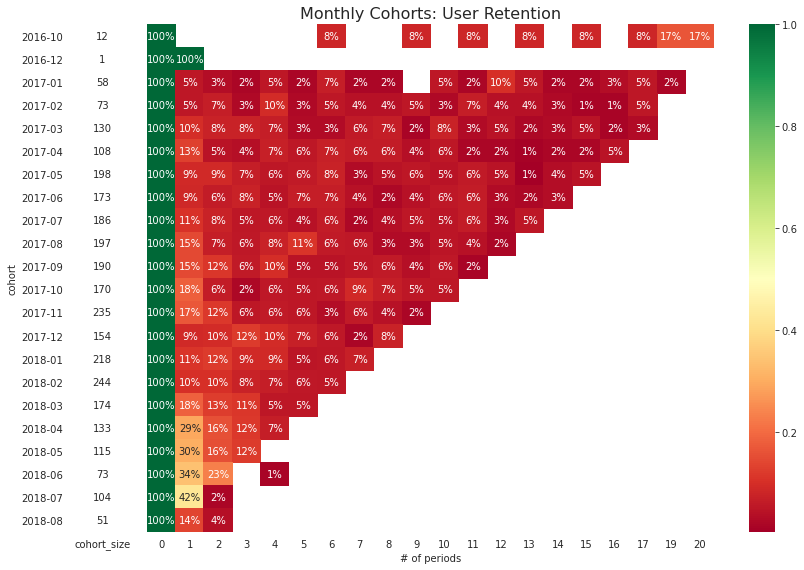

In [87]:

with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
    
    # retention matrix
    sns.heatmap(retention_matrix, 
                mask=retention_matrix.isnull(), 
                annot=True, 
                fmt='.0%', 
                cmap='RdYlGn', 
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention', fontsize=16)
    ax[1].set(xlabel='# of periods',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                cmap=white_cmap, 
                ax=ax[0])

    fig.tight_layout()


What do you notice? 

How could we have know that before? (hint : Calculate the percentage of customers who have ordered more than once)

Here is the code for the analysis of customers who have bought more than once : 

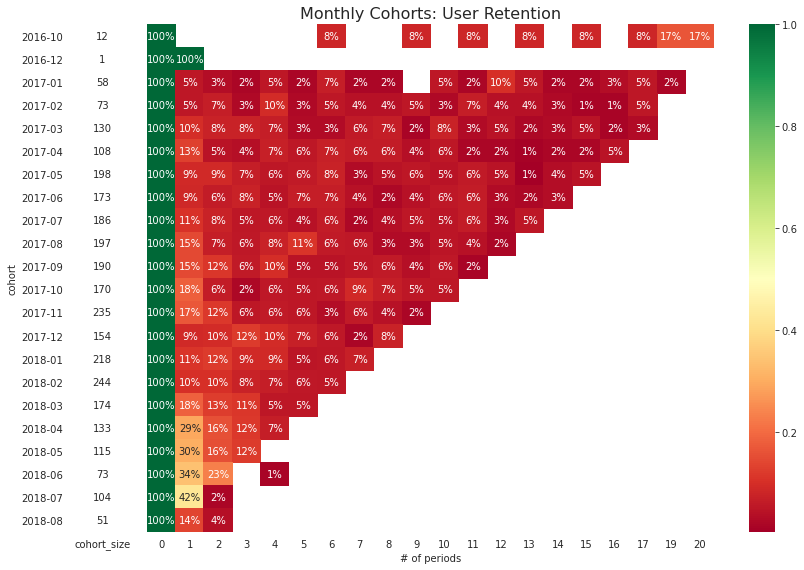

In [88]:
#start from your df created doing the RFM segmentation
df_c = df[['customer_unique_id', 'order_id',
           'order_purchase_timestamp']].drop_duplicates()

df_c['order_month'] = df_c['order_purchase_timestamp'].dt.to_period('M')

df_more = pd.DataFrame(df_c.groupby('customer_unique_id').size()[
                       df_c.groupby('customer_unique_id').size() > 1])

df_c = df_c.merge(df_more, how='left', on='customer_unique_id').rename(
    columns={0: 'na'})

df_c = df_c[df_c['na'].notna()]
df_c['cohort'] = df_c.groupby('customer_unique_id')['order_purchase_timestamp'] \
    .transform('min') \
    .dt.to_period('M')

df_cohort = df_c.groupby(['cohort', 'order_month']) \
    .agg(n_customers=('customer_unique_id', 'nunique')) \
    .reset_index(drop=False)
df_cohort['period_number'] = (
    df_cohort.order_month - df_cohort.cohort).apply(operator.attrgetter('n'))
cohort_pivot = df_cohort.pivot_table(index='cohort',
                                     columns='period_number',
                                     values='n_customers')
cohort_size = cohort_pivot.iloc[:, 0]
retention_matrix = cohort_pivot.divide(cohort_size, axis=0)

with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={
                           'width_ratios': [1, 11]})

    # retention matrix
    sns.heatmap(retention_matrix,
                mask=retention_matrix.isnull(),
                annot=True,
                fmt='.0%',
                cmap='RdYlGn',
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention', fontsize=16)
    ax[1].set(xlabel='# of periods',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(
        columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df,
                annot=True,
                cbar=False,
                fmt='g',
                cmap=white_cmap,
                ax=ax[0])

    fig.tight_layout()